In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import os
import re
import matplotlib.pyplot as plt
import matplotlib
import numpy

models = ["baseline_HMMLike_zero", "POS_Less", "linearCRF_l2_zero"]

In [38]:
# Funciones auxiliares
def label_to_float(element):
    label = "Loss: "
    return float(element[len(label):])

def graph_loss_function(data, conf):
    plt.rcParams['figure.figsize'] = [conf['width'], conf['height']]
    fig, ax = plt.subplots()
    #ax.grid(alpha=0.5, color="Teal")
    ax.locator_params(axis='y', nbins=10)
    ax.locator_params(axis='x', nbins=10)
    ax.set_xlabel(conf["xlabel"], fontsize=conf["fontsize"])
    ax.set_ylabel(conf["ylabel"], fontsize=conf["fontsize"])
    ax.set_title(conf["title"], fontsize=conf["fontsize"])
    ax.set_xlim([0,51])
    plt.tick_params(axis='both', direction='out', length=5, width=5,
                    labelcolor=conf['colors'][0], colors=conf['colors'][1])
    for k in [0, 9]:
        ax.plot(range(1, 51), data[k], color=conf["colors"].pop(), linewidth=3, marker="o")
    plt.legend([f"K={k}" for k in [1, 10]])
    plt.savefig(conf['path'], dpi=300, bbox_inches='tight')
    plt.show()

def graph_all_in_one(models, conf):
    plt.rcParams['figure.figsize'] = [conf['width'], conf['height']]
    fig, ax = plt.subplots()
    ax.grid(alpha=0.5, color=conf['colors'][0])
    ax.locator_params(axis='y', nbins=10)
    ax.locator_params(axis='x', nbins=10)
    ax.set_xlabel(conf["xlabel"], fontsize=conf["fontsize"])
    ax.set_ylabel(conf["ylabel"], fontsize=conf["fontsize"])
    ax.set_title(conf["title"], fontsize=conf["fontsize"])
    ax.set_xlim([0,51])
    plt.tick_params(axis='both', direction='out', length=5, width=5,
                    labelcolor=conf['colors'][0], colors=conf['colors'][1])
    for color, model in zip(conf["colors"], models): 
        data = get_loss_values(model)
        # data[9] == k = 10
        ax.plot(range(1, 51), data[9], color=color, linewidth=2.5, marker=".", label=model)
    plt.legend()
    plt.savefig(conf['path'], dpi=300, bbox_inches='tight')
    plt.show()
    
    
def get_loss_values(model_name):
    log_path =  os.path.join("../logs", model_name)
    with open(log_path + ".log", 'r') as f:
        log_text = f.read()
    pattern = re.compile("Loss: .+")
    raw_matches = pattern.findall(log_text)
    return [list(map(label_to_float, raw_matches[j:j+50])) for j in range(0, len(raw_matches), 50)]

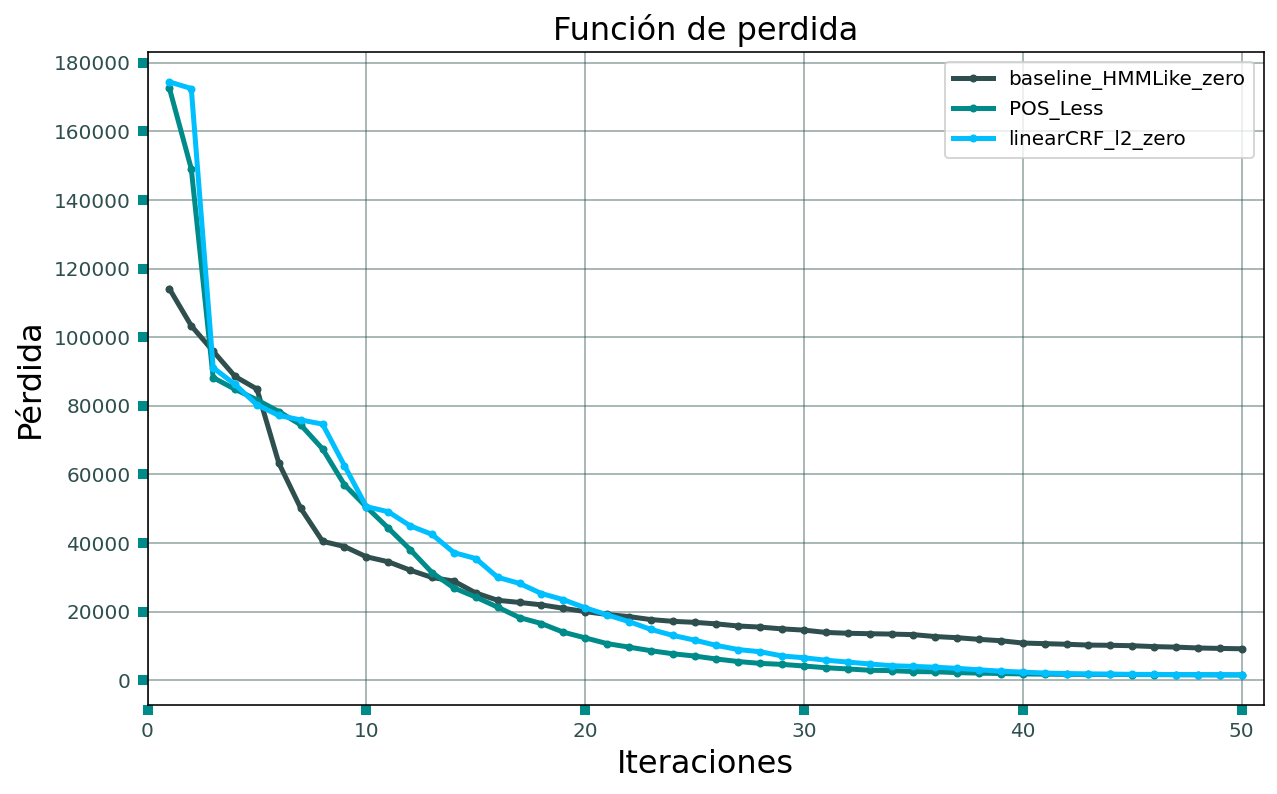

In [39]:
config = {"title": "Función de perdida", "width": 10, "height": 6, "fontsize": 16,
          "xlabel": "Iteraciones", "ylabel": "Pérdida",
          "colors": ['darkslategray', 'darkcyan', 'deepskyblue'],
          "path": os.path.join("../latex/img", "loss_models.png")}
graph_all_in_one(models, config)

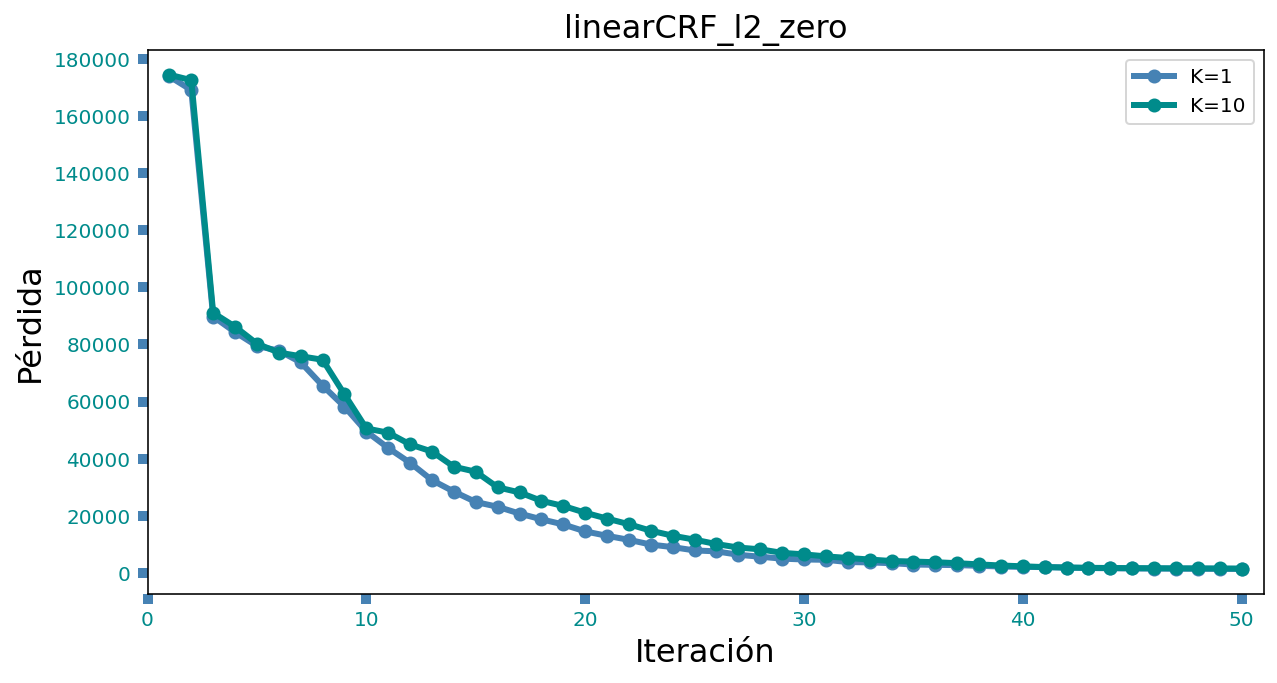

In [8]:

# linearCRF
model = models[0]
config = {"title": model, "width": 10, "height": 5, "fontsize": 16,
          "xlabel": "Iteración", "ylabel": "Pérdida",
          "colors": ['darkcyan', 'steelblue'],
          "path": os.path.join("../latex/img", model + ".png")}
graph_loss_function(get_loss_values(model), config)

In [ ]:
# POSLess
model = models[1]
config = {"title": model, "width": 10, "height": 5, "fontsize": 16,
          "xlabel": "Iteración", "ylabel": "Pérdida",
          "colors": ['orangered', 'crimson'],
          "path": os.path.join("../latex/img", model + ".png")}
graph_loss_function(get_loss_values(model), config)

In [ ]:
# baseline
model = models[2]
config = {"title": model, "width": 10, "height": 5, "fontsize": 16,
          "xlabel": "Iteración", "ylabel": "Pérdida",
          "colors": ['g', 'lime'],
          "path": os.path.join("../latex/img", model + ".png")}
graph_loss_function(get_loss_values(model), config)